In [1]:
!pip install opencv-python

In [2]:
import os
from keras.preprocessing import image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import cv2
from tensorflow.keras import datasets,layers,models
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [3]:
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import  ImageDataGenerator

In [4]:
import os

path = os.listdir('D:/practicebtp/train/')
classes = {'dry':0, 'rain':1}

In [5]:
import cv2
X = []
Y = []
for cls in classes:
    pth = 'D:/practicebtp/train/'+cls
    for j in os.listdir(pth):
        img = cv2.imread(pth+'/'+j, 0)
        img = cv2.resize(img, (200,200))
        X.append(img)
        Y.append(classes[cls])

In [6]:
X = np.array(X)
Y = np.array(Y)

X_updated = X.reshape(len(X), -1)

In [7]:
np.unique(Y)

array([0, 1])

In [8]:
pd.Series(Y).value_counts()

0    184
1     86
dtype: int64

In [9]:
X.shape, X_updated.shape

((270, 200, 200), (270, 40000))

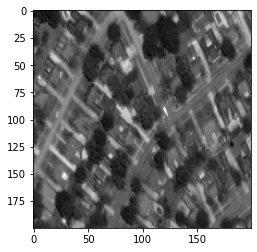

In [10]:
plt.imshow(X[0], cmap='gray')

In [11]:
X_updated = X.reshape(len(X), -1)
X_updated.shape

(270, 40000)

In [12]:
xtrain, xtest, ytrain, ytest = train_test_split(X_updated, Y, random_state=10,
                                               test_size=.20)

In [13]:
xtrain.shape, xtest.shape

((216, 40000), (54, 40000))

In [14]:
print(xtrain.max(), xtrain.min())
print(xtest.max(), xtest.min())
xtrain = xtrain/255
xtest = xtest/255
print(xtrain.max(), xtrain.min())
print(xtest.max(), xtest.min())

255 0
255 0
1.0 0.0
1.0 0.0


In [15]:
from sklearn.decomposition import PCA

In [16]:
print(xtrain.shape, xtest.shape)

pca = PCA(.98)
# pca_train = pca.fit_transform(xtrain)
# pca_test = pca.transform(xtest)
pca_train = xtrain
pca_test = xtest

(216, 40000) (54, 40000)


In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [18]:
import warnings
warnings.filterwarnings('ignore')

lg = LogisticRegression(C=0.1)
lg.fit(xtrain, ytrain)

LogisticRegression(C=0.1)

In [19]:
sv = SVC()
sv.fit(xtrain, ytrain)

SVC()

In [20]:
print("Training Score:", lg.score(xtrain, ytrain))
print("Testing Score:", lg.score(xtest, ytest))

Training Score: 1.0
Testing Score: 0.6111111111111112


In [21]:
print("Training Score:", sv.score(xtrain, ytrain))
print("Testing Score:", sv.score(xtest, ytest))

Training Score: 0.8194444444444444
Testing Score: 0.6666666666666666


In [27]:
pred = sv.predict(xtest) 

In [23]:
misclassified=np.where(ytest!=pred)
misclassified

(array([ 8, 10, 13, 20, 21, 22, 23, 31, 32, 33, 34, 39, 40, 41, 43, 45, 50,
        51], dtype=int64),)

In [32]:
pred[45]

0

In [33]:
ytest[45]

1

In [24]:
print("Total Misclassified Samples: ",len(misclassified[0]))
print(pred[36],ytest[36])

Total Misclassified Samples:  18
0 0


In [25]:
dec = {0:'Non flood', 1:'Flood'}

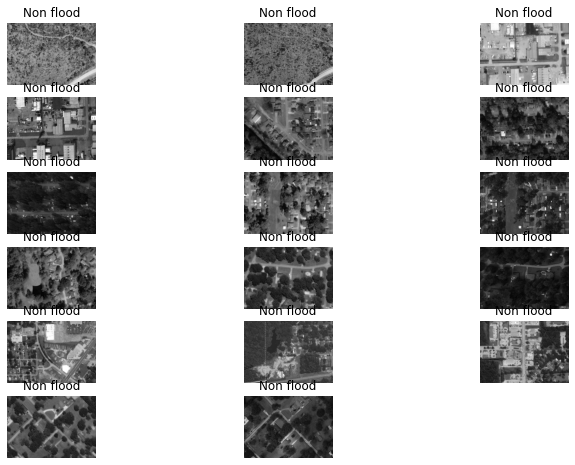

In [38]:
plt.figure(figsize=(12,8))
p = os.listdir('D:/practicebtp/test/')
c=1
for i in os.listdir('D:/practicebtp/test/dry/')[15:32]:
    plt.subplot(6,3,c)
    
    img = cv2.imread('D:/practicebtp/test/dry/'+i,0)
    img1 = cv2.resize(img, (200,200))
    img1 = img1.reshape(1,-1)/255
    p = sv.predict(img1)
    plt.title(dec[p[0]])
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    c+=1

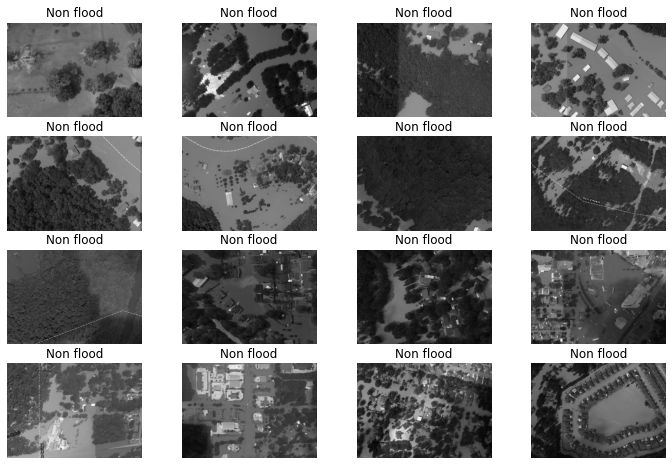

In [39]:
plt.figure(figsize=(12,8))
p = os.listdir('D:/practicebtp/test/')
c=1
for i in os.listdir('D:/practicebtp/test/rain/')[:16]:
    plt.subplot(4,4,c)
    
    img = cv2.imread('D:/practicebtp/test/rain/'+i,0)
    img1 = cv2.resize(img, (200,200))
    img1 = img1.reshape(1,-1)/255
    p = sv.predict(img1)
    plt.title(dec[p[0]])
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    c+=1